# **Test Image Processing**

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [ ]:
img = cv2.imread('/content/joy_5.jpg')
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_pil = Image.fromarray(grayscale)
img_28 = np.array(img_pil.resize((128, 128)))
print(img_28.shape)

(128, 128)


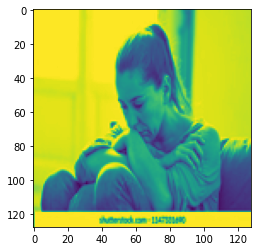

In [ ]:
plt.imshow(img_28)

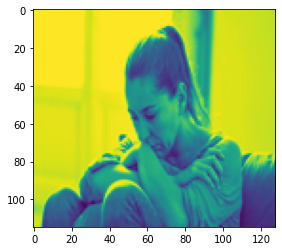

In [ ]:
cropped_image = img_28[0:115, :]
plt.imshow(cropped_image)

In [ ]:
img_flatten = cropped_image.reshape(-1)
print(len(img_flatten)/3)

46368.0


# **Image Data Processing & Converting it into Train Test Splits**

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
import os

In [ ]:
def resize_img(img):
  pillow_img = Image.fromarray(img)
  resized_img = np.array(pillow_img.resize((128, 128), Image.ANTIALIAS))
  return resized_img

def transform_image(path):
  img = cv2.imread(path)
  grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  resized_img = resize_img(grayscale)

  cropped_image = resized_img[0:115, :]
  resized_img = resize_img(cropped_image)
  image = Image.fromarray(resized_img)
  return image

In [ ]:
def get_image_vectors(dir_path):
  images = []
  DIR_PATH = dir_path

  for file in sorted(os.listdir(DIR_PATH)):
    file_name = file
    file_path = DIR_PATH + '/' + file_name

    image_vector = transform_image(file_path)
    images.append(image_vector)

  return images

def split_and_store(images, train_path, test_path, tag):
  train_path = os.path.join(train_path, tag)
  test_path = os.path.join(test_path, tag)

  os.mkdir(train_path)
  os.mkdir(test_path)

  train, test = train_test_split(images, test_size=0.2)

  for idx, image in enumerate(train):
    cleaned_file_path = train_path + '/{}.jpg'.format(str(idx+1))
    image.save(cleaned_file_path)

  for idx, image in enumerate(test):
    cleaned_file_path = test_path + '/{}.jpg'.format(str(idx+1))
    image.save(cleaned_file_path)

  return True

In [ ]:
!unzip '/content/depression_anxiety.zip'
dir_path = '/content/depression_anxiety'
images = get_image_vectors(dir_path)

root_dir = '/content/processed_data'
os.mkdir(root_dir)

train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
os.mkdir(train_dir)
os.mkdir(test_dir)

split_and_store(images, train_dir, test_dir, 'depression')

True

In [ ]:
!unzip '/content/Happiness.zip'
dir_path = '/content/Happiness'
not_depressed_images = get_image_vectors(dir_path)
split_and_store(not_depressed_images, train_dir, test_dir, 'not_depressed')

In [ ]:
!zip -r '/content/processed_data.zip' '/content/processed_data'